<a href="https://colab.research.google.com/github/vermamuskan/Sign-Language-Translator-using-Convolutional-Neural-Network/blob/main/Sign_Language_Translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import cv2 as cv
import pandas as pd
import os
import numpy as np
import imutils
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.utils.np_utils import to_categorical
from google.colab import drive
drive.mount('/gdrive')




Mounted at /gdrive


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [ ]:
def create_Train():
    features = []
    labels = []
    letters = []

    for i in os.listdir(r'/gdrive/MyDrive/ASL/dataset/Front_CAM'):
        letters.append(i)

    DIR = r'/gdrive/MyDrive/ASL/dataset/Front_CAM'
    size = 200,200
   # for view in os.listdir(DIR):
    # v_path = os.path.join(DIR,view)
    for l in letters:
      path = os.path.join(DIR, l)
      label = letters.index(l)

      for j in os.listdir(path):
        img_p = os.path.join(path, j)
        img_array = cv.imread(img_p)
        #img_array = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
        img_array = cv.resize(img_array,size)
        img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)
        features.append(img_array)
        labels.append(label)

    X = np.array(features)
    y = to_categorical(labels)

    return X, y

X,y= create_Train()




#print(labels)
print(y)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from keras import optimizers

#X = X.astype('float32')
#input_test = input_test.astype('float32')

# Scale data
#X = X / 255
#input_test = input_test / 255
from sklearn.utils import shuffle
shuffle(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(200,200,3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train, y_train,batch_size=30,epochs=11, verbose=1)

# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


In [ ]:
print(len(y))

4160


In [ ]:
from sklearn.utils import shuffle
from keras import optimizers
from keras.callbacks import ModelCheckpoint
shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_test)
#print(y_train)

def create_model():
  model = Sequential()
  model.add(Conv2D(16, (2,2), input_shape=(200, 200, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
  model.add(Conv2D(64, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(26, activation='softmax'))
  sgd = optimizers.SGD(lr=1e-2)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  filepath="cnn_model_keras2.h5"
  checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  callbacks_list = [checkpoint1]
	#from keras.utils import plot_model
	#plot_model(model, to_file='model.png', show_shapes=True)
  return model, callbacks_list


'''
  model.add(Conv2D(64,kernel_size=[3,3],padding='same', input_shape=(200,200,3), activation='relu'))  # first hidden layer
  model.add(Conv2D(64,kernel_size=[3,3],padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=[3,3]))

  model.add(Conv2D(128,kernel_size=[5,5],padding='same', activation='relu'))
  model.add(Conv2D(128,kernel_size=[5,5],padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=[3,3]))

  model.add(Conv2D(256,kernel_size=[5,5],padding='same', activation='relu'))  # first hidden layer
  model.add(Conv2D(256,kernel_size=[5,5],padding='same', activation='relu'))
  model.add(Conv2D(256,kernel_size=[5,5],padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=[3,3]))


  #model.add(Conv2D(512,kernel_size=[5,5],padding='same', activation='relu'))  # first hidden layer
  #model.add(Conv2D(512,kernel_size=[5,5],padding='same', activation='relu'))
  #model.add(MaxPooling2D(pool_size=[3,3]))

  #model.add(Conv2D(512,kernel_size=[3,3],padding='same', activation='relu'))
  #model.add(MaxPooling2D(pool_size=[2,2]))

  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dropout(0.6))

  #model.add(Dense(1024, activation='relu',kernel_regularizer= regularizers.l2(0.001)))
  #model.add(Dense(512, activation='relu',kernel_regularizer= regularizers.l2(0.001)))   
  #model.add(Dense(512, activation='softmax'))   # output layer
  #model.add(Dense(512, activation='softmax'))  
  #model.add(Dense(512, activation='softmax'))  
  model.add(Dense(26, activation='softmax'))   # output layer
  #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
'''
  



"\n  model.add(Conv2D(64,kernel_size=[3,3],padding='same', input_shape=(200,200,3), activation='relu'))  # first hidden layer\n  model.add(Conv2D(64,kernel_size=[3,3],padding='same', activation='relu'))\n  model.add(MaxPooling2D(pool_size=[3,3]))\n\n  model.add(Conv2D(128,kernel_size=[5,5],padding='same', activation='relu'))\n  model.add(Conv2D(128,kernel_size=[5,5],padding='same', activation='relu'))\n  model.add(MaxPooling2D(pool_size=[3,3]))\n\n  model.add(Conv2D(256,kernel_size=[5,5],padding='same', activation='relu'))  # first hidden layer\n  model.add(Conv2D(256,kernel_size=[5,5],padding='same', activation='relu'))\n  model.add(Conv2D(256,kernel_size=[5,5],padding='same', activation='relu'))\n  model.add(MaxPooling2D(pool_size=[3,3]))\n\n\n  #model.add(Conv2D(512,kernel_size=[5,5],padding='same', activation='relu'))  # first hidden layer\n  #model.add(Conv2D(512,kernel_size=[5,5],padding='same', activation='relu'))\n  #model.add(MaxPooling2D(pool_size=[3,3]))\n\n  #model.add(Conv

In [ ]:
model, callbacks_list = create_model()
model.summary()
X_train, val_images, y_train, val_labels = train_test_split(X_train, y_train, test_size=0.2)

model.fit(X_train, y_train, validation_data=(val_images, val_labels), epochs=15, batch_size=500, callbacks=callbacks_list)
scores = model.evaluate(val_images, val_labels, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_585 (Conv2D)          (None, 199, 199, 16)      208       
_________________________________________________________________
max_pooling2d_304 (MaxPoolin (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_586 (Conv2D)          (None, 98, 98, 32)        4640      
_________________________________________________________________
max_pooling2d_305 (MaxPoolin (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_587 (Conv2D)          (None, 29, 29, 64)        51264     
_________________________________________________________________
max_pooling2d_306 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_87 (Flatten)         (None, 2304)            

In [ ]:
model1 = create_model()
H = model1.fit(X_train, y_train, epochs=14, batch_size=60, verbose=1)
_, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print(accuracy)

Epoch 1/14
14/14 [==============================] - 1s 43ms/step - loss: nan - accuracy: 0.0317
Epoch 2/14
14/14 [==============================] - 0s 30ms/step - loss: nan - accuracy: 0.0419
Epoch 3/14
14/14 [==============================] - 0s 29ms/step - loss: nan - accuracy: 0.0292
Epoch 4/14
14/14 [==============================] - 0s 29ms/step - loss: nan - accuracy: 0.0512
Epoch 5/14
14/14 [==============================] - 0s 29ms/step - loss: nan - accuracy: 0.0443
Epoch 6/14
14/14 [==============================] - 0s 29ms/step - loss: nan - accuracy: 0.0357
Epoch 7/14
14/14 [==============================] - 0s 29ms/step - loss: nan - accuracy: 0.0433
Epoch 8/14
14/14 [==============================] - 0s 29ms/step - loss: nan - accuracy: 0.0387
Epoch 9/14
14/14 [==============================] - 0s 29ms/step - loss: nan - accuracy: 0.0457
Epoch 10/14
14/14 [==============================] - 0s 29ms/step - loss: nan - accuracy: 0.0407
Epoch 11/14
14/14 [====================

In [ ]:
model1 = create_model()
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
H = model1.fit(X_train, y_train, epochs=14, batch_size=60, verbose=1)
_, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print(accuracy)

Epoch 1/14
14/14 [==============================] - 5s 326ms/step - loss: 4.2422 - accuracy: 0.0360
Epoch 2/14
14/14 [==============================] - 5s 326ms/step - loss: 3.3796 - accuracy: 0.1053
Epoch 3/14
14/14 [==============================] - 5s 327ms/step - loss: 3.2644 - accuracy: 0.0796
Epoch 4/14
14/14 [==============================] - 5s 329ms/step - loss: 3.2087 - accuracy: 0.0834
Epoch 5/14
14/14 [==============================] - 5s 329ms/step - loss: 3.2649 - accuracy: 0.0904
Epoch 6/14
14/14 [==============================] - 5s 330ms/step - loss: 3.0343 - accuracy: 0.1577
Epoch 7/14
14/14 [==============================] - 5s 332ms/step - loss: 3.0041 - accuracy: 0.1302
Epoch 8/14
14/14 [==============================] - 5s 331ms/step - loss: 2.9835 - accuracy: 0.1432
Epoch 9/14
14/14 [==============================] - 5s 333ms/step - loss: 2.7289 - accuracy: 0.1987
Epoch 10/14
14/14 [==============================] - 5s 332ms/step - loss: 2.7195 - accuracy: 0.2009

Epoch 1/9
10/10 [==============================] - 4s 344ms/step - loss: 5.4712 - accuracy: 0.0446 - val_loss: 291.9341 - val_accuracy: 0.0360
Epoch 2/9
10/10 [==============================] - 3s 325ms/step - loss: 4.3866 - accuracy: 0.0840 - val_loss: 175.2785 - val_accuracy: 0.0440
Epoch 3/9
10/10 [==============================] - 3s 326ms/step - loss: 4.0797 - accuracy: 0.1181 - val_loss: 70.4420 - val_accuracy: 0.0440
Epoch 4/9
10/10 [==============================] - 3s 325ms/step - loss: 4.1210 - accuracy: 0.0843 - val_loss: 19.4333 - val_accuracy: 0.0360
Epoch 5/9
10/10 [==============================] - 3s 325ms/step - loss: 4.0071 - accuracy: 0.0674 - val_loss: 98.9994 - val_accuracy: 0.0440
Epoch 6/9
10/10 [==============================] - 3s 326ms/step - loss: 3.7155 - accuracy: 0.1096 - val_loss: 159.6153 - val_accuracy: 0.0440
Epoch 7/9
10/10 [==============================] - 3s 326ms/step - loss: 3.7262 - accuracy: 0.1183 - val_loss: 157.6038 - val_accuracy: 0.0240
Ep

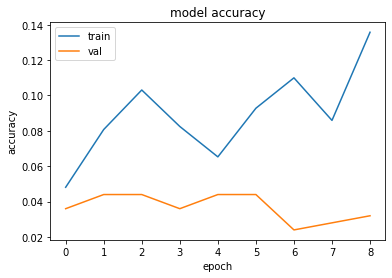

In [ ]:
from matplotlib import pyplot as plt
model1 = create_model()
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
H = model1.fit(X_train, y_train,validation_split = 0.3, epochs=9, batch_size=60)
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
_, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print(accuracy)

0.028846153989434242


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(model1.summary())

In [ ]:
model = create_model()
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
H = model.fit(X_train, y_train, epochs=11, batch_size=60, verbose=1)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(accuracy)

Epoch 1/11
11/11 [==============================] - 4s 255ms/step - loss: 21.3020 - accuracy: 0.0490
Epoch 2/11
11/11 [==============================] - 3s 256ms/step - loss: 19.6660 - accuracy: 0.1244
Epoch 3/11
11/11 [==============================] - 3s 258ms/step - loss: 13.7644 - accuracy: 0.1568
Epoch 4/11
11/11 [==============================] - 3s 260ms/step - loss: 11.2631 - accuracy: 0.1693
Epoch 5/11
11/11 [==============================] - 3s 261ms/step - loss: 8.5268 - accuracy: 0.2217
Epoch 6/11
11/11 [==============================] - 3s 262ms/step - loss: 7.7173 - accuracy: 0.2475
Epoch 7/11
11/11 [==============================] - 3s 261ms/step - loss: 6.4943 - accuracy: 0.3266
Epoch 8/11
11/11 [==============================] - 3s 259ms/step - loss: 6.5554 - accuracy: 0.2935
Epoch 9/11
11/11 [==============================] - 3s 257ms/step - loss: 4.9541 - accuracy: 0.4067
Epoch 10/11
11/11 [==============================] - 3s 257ms/step - loss: 3.4732 - accuracy: 0.

In [ ]:
_, accuracy = model1.evaluate(X_test, y_test, verbose=1)
print(accuracy)

7/7 [==============================] - 0s 53ms/step - loss: 537.0913 - accuracy: 0.0240
0.024038461968302727


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
model1 = KerasClassifier(build_fn=create_model, verbose=1)
# define parameters and values for grid search 
param_grid = {
    'batch_size': [16, 60],
    'epochs': [7,11],
   # 'dropout_rate': [0.0, 0.10, 0.20, 0.30],
}
grid = GridSearchCV(estimator=model1, param_grid=param_grid ,cv=3)
grid_result = grid.fit(X_train, y_train) 

In [ ]:
best_params=grid_result.best_params_ 
accuracy=grid_result.best_score_ 
print(accuracy)
print(best_params)

In [ ]:
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(accuracy)

0.03365384787321091


In [ ]:
from keras.utils import plot_model
from keras.layers import Convolution2D, Dropout, Dense, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
from numpy import array
from keras import regularizers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.wrappers.scikit_learn import KerasClassifier
import cv2 as cv
import pandas as pd
import os
import numpy as np
import imutils
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.utils.np_utils import to_categorical

def create_Train():
    features = []
    labels = []
    letters = []

    for i in os.listdir(r'/gdrive/MyDrive/ASL/dataset/Front_CAM'):
        letters.append(i)

    DIR = r'/gdrive/MyDrive/ASL/dataset/Front_CAM'
    size = 500,500
    #for view in os.listdir(DIR):
     # v_path = os.path.join(DIR,view)
    for l in letters:
        path = os.path.join(DIR, l)
        label = letters.index(l)
        for j in os.listdir(path):
            img_p = os.path.join(path, j)
            img_array = cv.imread(img_p)
            img_array = cv.resize(img_array,size)
            #img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)
            img_array = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
            features.append(img_array)
            labels.append(label)

    X = np.array(features)
    y = to_categorical(labels)

    return X, y

X,y= create_Train()




In [ ]:
from sklearn.utils import shuffle
shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_test)
#print(y_train)
shuffle(X_test,y_test)
shuffle(X_train,y_train)




#init the model
model= Sequential()

#add conv layers and pooling layers 
model.add(Convolution2D(32,3,3, input_shape=(200,200,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,5,5, input_shape=(200,200,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))





model.add(Dropout(0.4)) #to reduce overfitting

model.add(Flatten())

#Now two hidden(dense) layers:
model.add(Dense( 150, activation = 'relu',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dropout(0.6))#again for regularization

model.add(Dense(150, activation = 'relu',
                kernel_regularizer=regularizers.l2(0.01)))



model.add(Dense(150, activation = 'swish',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(150, activation = 'swish',
                kernel_regularizer=regularizers.l2(0.01)))




model.add(Dropout(0.4))#last one lol

model.add(Dense(150, activation = 'relu',
                kernel_regularizer=regularizers.l2(0.01)))

#output layer
model.add(Dense(26, activation = 'sigmoid'))


#Now copile it
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

#X_train, val_images, y_train, val_labels = train_test_split(X_train, y_train, test_size=0.2)
'''
dataAugmentaion = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.1, height_shift_range = 0.1)
model.fit_generator(dataAugmentaion.flow(X_train,y_train),
                         samples_per_epoch = 1956,
                         nb_epoch = 10,
                         validation_data = (X_test,y_test),
                         nb_val_samples = 320)

'''

H = model.fit(X_train, y_train, epochs=45, batch_size=70, verbose=1)



scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print(scores[1])


#after 10 epochs:
    #training accuracy: 0.9005
    #training loss:     0.4212
    #test set accuracy: 0.8813
    #test set loss:     0.5387







In [ ]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_test)
#print(y_train)
shuffle(X_test,y_test)
shuffle(X_train,y_train)
def model_cr():
  model = Sequential()
  model.add(Conv2D(16, (2,2), input_shape=(200, 200, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(Conv2D(64, (3,3), activation='swish'))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(Conv2D(64, (3,3), activation='swish'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
  model.add(Conv2D(64, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
  model.add(Flatten())
  model.add(Dense(128, activation='swish'))
  model.add(Dropout(0.7))
  model.add(Dense(26, activation='softmax'))
  sgd = optimizers.SGD(lr=1e-2)
  model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
  filepath="cnn_model_keras2.h5"
  checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  callbacks_list = [checkpoint1]
	#from keras.utils import plot_model
	#plot_model(model, to_file='model.png', show_shapes=True)
  return model, callbacks_list

model, callbacks_list = model_cr()
#model.summary()
#X_train, val_images, y_train, val_labels = train_test_split(X_train, y_train, test_size=0.2)

model.fit(X_train, y_train, epochs=75, batch_size=60, callbacks=callbacks_list)
scores = model.evaluate(X_test, y_test, verbose=0)

print("CNN acc: %.2f%%" % (scores[1]*100))

Epoch 1/75
14/14 [==============================] - 2s 109ms/step - loss: 45.2444 - accuracy: 0.0256
Epoch 2/75
14/14 [==============================] - 2s 107ms/step - loss: 3.3802 - accuracy: 0.0330
Epoch 3/75
14/14 [==============================] - 2s 108ms/step - loss: 3.3410 - accuracy: 0.0401
Epoch 4/75
14/14 [==============================] - 2s 107ms/step - loss: 3.2887 - accuracy: 0.0482
Epoch 5/75
14/14 [==============================] - 1s 107ms/step - loss: 3.3253 - accuracy: 0.0777
Epoch 6/75
14/14 [==============================] - 1s 106ms/step - loss: 3.3195 - accuracy: 0.0460
Epoch 7/75
14/14 [==============================] - 2s 107ms/step - loss: 3.3247 - accuracy: 0.0634
Epoch 8/75
14/14 [==============================] - 2s 107ms/step - loss: 3.2554 - accuracy: 0.0590
Epoch 9/75
14/14 [==============================] - 1s 107ms/step - loss: 3.1653 - accuracy: 0.0806
Epoch 10/75
14/14 [==============================] - 2s 108ms/step - loss: 3.2394 - accuracy: 0.079

In [ ]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_test)
#print(y_train)
shuffle(X_test,y_test)
shuffle(X_train,y_train)
def model_cr():
  model = Sequential()
  model.add(Conv2D(16, (2,2), input_shape=(200, 200, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(Conv2D(32, (3,3), activation='swish'))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(Conv2D(32, (3,3), activation='swish'))

  model.add(Conv2D(64, (3,3), activation='swish'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
  model.add(Conv2D(64, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  #model.add(Dropout(0.4))
 
  model.add(Dense(128, activation='swish'))
  model.add(Dropout(0.7))
  model.add(Dense(26, activation='softmax'))
  sgd = optimizers.SGD(lr=1e-2)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #filepath="cnn_model_keras2.h5"
  #checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  #callbacks_list = [checkpoint1]
	#from keras.utils import plot_model
	#plot_model(model, to_file='model.png', show_shapes=True)
  return model

model = model_cr()
#model.summary()
#X_train, val_images, y_train, val_labels = train_test_split(X_train, y_train, test_size=0.2)

model.fit(X_train, y_train, epochs=80, batch_size=60)
scores = model.evaluate(X_test, y_test, verbose=0)

print("CNN acc: %.2f%%" % (scores[1]*100))

Epoch 1/80
11/11 [==============================] - 5s 213ms/step - loss: 4.4561 - accuracy: 0.0314
Epoch 2/80
11/11 [==============================] - 2s 172ms/step - loss: 3.2846 - accuracy: 0.0396
Epoch 3/80
11/11 [==============================] - 2s 172ms/step - loss: 3.2641 - accuracy: 0.0395
Epoch 4/80
11/11 [==============================] - 2s 172ms/step - loss: 3.2590 - accuracy: 0.0262
Epoch 5/80
11/11 [==============================] - 2s 173ms/step - loss: 3.2573 - accuracy: 0.0426
Epoch 6/80
11/11 [==============================] - 2s 173ms/step - loss: 3.2648 - accuracy: 0.0470
Epoch 7/80
11/11 [==============================] - 2s 172ms/step - loss: 3.2576 - accuracy: 0.0454
Epoch 8/80
11/11 [==============================] - 2s 173ms/step - loss: 3.2429 - accuracy: 0.0580
Epoch 9/80
11/11 [==============================] - 2s 172ms/step - loss: 3.2399 - accuracy: 0.0550
Epoch 10/80
11/11 [==============================] - 2s 172ms/step - loss: 3.2173 - accuracy: 0.0703

In [ ]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
shuffle(X,y)

X = X/255.0
X = np.asarray(X).astype('float32')
# val_images = val_images/255.0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_test)
#print(y_train)
#shuffle(X_test,y_test)
#shuffle(X_train,y_train)
def model_cr():
  model = Sequential()
  model.add(Conv2D(16, (5,5), input_shape=(200, 200, 3), activation='relu'))
  #model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
  model.add(Conv2D(32, (5,5), activation='relu',padding='valid'))
  model.add(Conv2D(64, (5,5), activation='relu', padding='valid'))
  #model.add(Conv2D(32, (3,3), activation='relu'))
  #model.add(Conv2D(32, (3,3), activation='swish'))
  #model.add(Conv2D(64, (3,3), activation='relu'))
  #model.add(Conv2D(48, (3,3), activation='swish'))

  #model.add(Conv2D(64, (3,3), activation='swish'))
  #model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
  #model.add(Conv2D(64, (5,5), activation='relu'))
  #model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
  model.add(Flatten())
  #model.add(Dense(128, activation='swish'))
  #model.add(Dropout(0.5))
  model.add(Dense(26, activation='softmax'))
  sgd = optimizers.SGD(lr=1e-2)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #filepath="cnn_model_keras2.h5"
  #checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  #callbacks_list = [checkpoint1]
	#from keras.utils import plot_model
	#plot_model(model, to_file='model.png', show_shapes=True)
  return model

model = model_cr()
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 196, 196, 16)      1216      
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 192, 192, 32)      12832     
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 188, 188, 64)      51264     
_________________________________________________________________
flatten_18 (Flatten)         (None, 2262016)           0         
_________________________________________________________________
dense_34 (Dense)             (None, 26)                58812442  
Total params: 58,877,754
Trainable params: 58,877,754
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from matplotlib import pyplot as plt
#model = create_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
H = model.fit(X_train, y_train,validation_split = 0.2, epochs=80, batch_size=60)
print(H.history.keys())
#  "Accuracy"
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
scores = model.evaluate(X_test, y_test, verbose=0)

print("CNN acc: %.2f%%" % (scores[1]*100))


Epoch 1/80
12/12 [==============================] - 4s 179ms/step - loss: 3.3404 - accuracy: 0.0371 - val_loss: 3.2584 - val_accuracy: 0.0419
Epoch 2/80
12/12 [==============================] - 2s 138ms/step - loss: 3.2579 - accuracy: 0.0268 - val_loss: 3.2590 - val_accuracy: 0.0359
Epoch 3/80
12/12 [==============================] - 2s 137ms/step - loss: 3.2575 - accuracy: 0.0487 - val_loss: 3.2591 - val_accuracy: 0.0359
Epoch 4/80
12/12 [==============================] - 2s 137ms/step - loss: 3.2572 - accuracy: 0.0450 - val_loss: 3.2593 - val_accuracy: 0.0359
Epoch 5/80
12/12 [==============================] - 2s 137ms/step - loss: 3.2573 - accuracy: 0.0248 - val_loss: 3.2595 - val_accuracy: 0.0299
Epoch 6/80
12/12 [==============================] - 2s 136ms/step - loss: 3.2576 - accuracy: 0.0504 - val_loss: 3.2599 - val_accuracy: 0.0240
Epoch 7/80
12/12 [==============================] - 2s 137ms/step - loss: 3.2572 - accuracy: 0.0486 - val_loss: 3.2600 - val_accuracy: 0.0240
Epoch 

KeyboardInterrupt: ignored

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 199, 199, 16)      208       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 98, 98, 32)        4640      
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 94, 94, 32)        18464     
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 92, 92, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 31, 31, 64)      

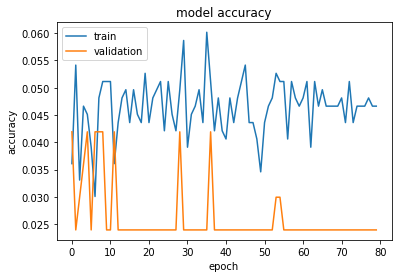

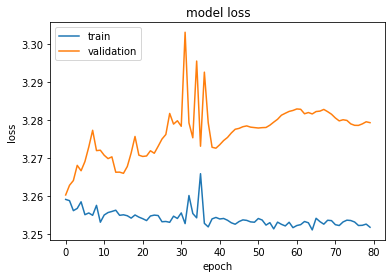

CNN acc: 2.40%


In [ ]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
shuffle(X,y)

X = X/255.0
X = np.asarray(X).astype('float32')
# val_images = val_images/255.0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_test)
#print(y_train)
#shuffle(X_test,y_test)
#shuffle(X_train,y_train)
def model_cr():
  model = Sequential()
  model.add(Conv2D(12, (2,2), input_shape=(200, 200, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
  model.add(Conv2D(24, (3,3), activation='relu',padding='valid'))
  model.add(Conv2D(36, (3,3), activation='relu'))
  #model.add(Conv2D(32, (3,3), activation='relu'))
  #model.add(Conv2D(32, (3,3), activation='swish'))
  #model.add(Conv2D(64, (3,3), activation='relu'))
  #model.add(Conv2D(48, (3,3), activation='swish'))

  #model.add(Conv2D(64, (3,3), activation='swish'))
  #model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
  #model.add(Conv2D(64, (5,5), activation='relu'))
  #model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
  model.add(Flatten())
  model.add(Dense(128, activation='swish'))
  model.add(Dropout(0.5))
  model.add(Dense(26, activation='softmax'))
  sgd = optimizers.SGD(lr=1e-2)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #filepath="cnn_model_keras2.h5"
  #checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  #callbacks_list = [checkpoint1]
	#from keras.utils import plot_model
	#plot_model(model, to_file='model.png', show_shapes=True)
  return model

model = model_cr()
model.summary()
#X_train, val_images, y_train, val_labels = train_test_split(X_train, y_train, test_size=0.2)

#model.fit(X_train, y_train, epochs=80, batch_size=60)

from matplotlib import pyplot as plt
#model = create_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
H = model.fit(X_train, y_train,validation_split = 0.2, epochs=80, batch_size=60)
print(H.history.keys())
#  "Accuracy"
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
scores = model.evaluate(X_test, y_test, verbose=0)

print("CNN acc: %.2f%%" % (scores[1]*100))


In [ ]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_test)
#print(y_train)
shuffle(X_test,y_test)
shuffle(X_train,y_train)
def model_cr():
  model = Sequential()
  model.add(Conv2D(16, (2,2), input_shape=(500, 500, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(Conv2D(32, (3,3), activation='swish'))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(Conv2D(64, (3,3), activation='swish'))

  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
  model.add(Conv2D(64, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
  model.add(Flatten())
  model.add(Dense(128, activation='swish'))
  model.add(Dropout(0.6))
  model.add(Dense(26, activation='softmax'))
  sgd = optimizers.SGD(lr=1e-2)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #filepath="cnn_model_keras2.h5"
  #checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  #callbacks_list = [checkpoint1]
	#from keras.utils import plot_model
	#plot_model(model, to_file='model.png', show_shapes=True)
  return model

model = model_cr()
#model.summary()
#X_train, val_images, y_train, val_labels = train_test_split(X_train, y_train, test_size=0.2)

model.fit(X_train, y_train, epochs=11, batch_size=60)
scores = model.evaluate(X_test, y_test, verbose=0)

print("CNN acc: %.2f%%" % (scores[1]*100))

Epoch 1/11
14/14 [==============================] - 14s 976ms/step - loss: 8.8434 - accuracy: 0.0367
Epoch 2/11
14/14 [==============================] - 14s 1s/step - loss: 3.2815 - accuracy: 0.0319
Epoch 3/11
14/14 [==============================] - 14s 1s/step - loss: 3.2555 - accuracy: 0.0370
Epoch 4/11
14/14 [==============================] - 14s 974ms/step - loss: 3.2575 - accuracy: 0.0364
Epoch 5/11
14/14 [==============================] - 13s 960ms/step - loss: 3.2559 - accuracy: 0.0447
Epoch 6/11
14/14 [==============================] - 13s 958ms/step - loss: 3.2574 - accuracy: 0.0316
Epoch 7/11
14/14 [==============================] - 14s 969ms/step - loss: 3.2555 - accuracy: 0.0463
Epoch 8/11
14/14 [==============================] - 14s 984ms/step - loss: 3.2551 - accuracy: 0.0399
Epoch 9/11
14/14 [==============================] - 14s 987ms/step - loss: 3.2640 - accuracy: 0.0483
Epoch 10/11
14/14 [==============================] - 14s 983ms/step - loss: 3.2554 - accuracy: 0.

In [ ]:
from sklearn.utils import shuffle
shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint
#print(X_test)
#print(y_train)
shuffle(X_test,y_test)
shuffle(X_train,y_train)
def model_cr():
  model = Sequential()
  model.add(Conv2D(16, (2,2), input_shape=(500, 500, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3)))
  model.add(Conv2D(64, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3)))
  



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
def create_Train():
    features = []
    labels = []
    letters = []

    for i in os.listdir(r'/gdrive/MyDrive/ASL/dataset/Front_CAM'):
        letters.append(i)

    DIR = r'/gdrive/MyDrive/ASL/dataset/Front_CAM'
    size = 500,500
    #for view in os.listdir(DIR):
     # v_path = os.path.join(DIR,view)
    for l in letters:
        path = os.path.join(DIR, l)
        label = letters.index(l)
        for j in os.listdir(path):
            img_p = os.path.join(path, j)
            img_array = cv.imread(img_p)
            img_array = cv.resize(img_array,size)
            #img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)
            img_array = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
            features.append(img_array)
            labels.append(label)

    X = np.array(features)
    y = to_categorical(labels)

    return X, y

X,y= create_Train()




**kaggle csv**

In [ ]:
# Load files and assign variables to X and Y
train = pd.read_csv("/gdrive/MyDrive/ASL/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("/gdrive/MyDrive/ASL/sign_mnist_test/sign_mnist_test.csv")

# Define train and test set
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

X_train = train.drop(labels=['label'], axis=1)
Y_train = train['label']
X_test = test.drop(labels=['label'], axis=1)
Y_test = test['label']

In [ ]:
# Show image from dataset
def gen_image(image):
    """Return 28x28 image given grayscale values"""
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()


In [ ]:
print(Y_test.shape)

(7172,)


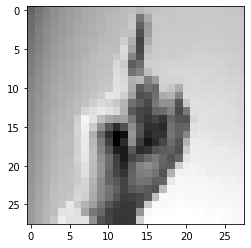

In [ ]:
# Get image from training set
gen_image(np.array(X_train.iloc[0]))

In [ ]:
label_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',\
             18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y'}
label_dict_rev = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'K':9,'L':10,'M':11,'N':12,'O':13,'P':14,'Q':15,'R':16,\
                 'S':17,'T':18,'U':19,'V':20,'W':21,'X':22,'Y':23}

Y_test1 = []
for i in Y_test:
    Y_test1.append(label_dict_rev.get(label_dict.get(i)))

Y_test2 = to_categorical(Y_test1, num_classes = 24)
Y_train = train['label']

Y_train1 = []
for i in Y_train:
    Y_train1.append(label_dict_rev.get(label_dict.get(i)))
    
# Classes labeled as 1-24; Need to change to 0-23 for to_categorical
Y_train2 = to_categorical(Y_train1, num_classes = 24)
X_train = train.drop(labels=['label'], axis=1)

In [ ]:
# Normalize pixels
X_train1 = X_train/255
X_test1 = X_test/255

In [ ]:
print(X_test1)

        pixel1    pixel2    pixel3  ...  pixel782  pixel783  pixel784
0     0.584314  0.584314  0.588235  ...  0.439216  0.470588  0.419608
1     0.494118  0.501961  0.513725  ...  0.721569  0.713725  0.705882
2     0.333333  0.345098  0.360784  ...  0.882353  0.878431  0.870588
3     0.796078  0.803922  0.811765  ...  0.941176  0.992157  1.000000
4     0.737255  0.749020  0.756863  ...  0.180392  0.180392  0.207843
...        ...       ...       ...  ...       ...       ...       ...
7167  0.529412  0.466667  0.423529  ...  0.690196  0.654902  0.639216
7168  0.615686  0.623529  0.631373  ...  0.823529  0.819608  0.815686
7169  0.745098  0.749020  0.745098  ...  0.827451  0.819608  0.815686
7170  0.788235  0.803922  0.815686  ...  0.262745  0.274510  0.247059
7171  0.678431  0.682353  0.678431  ...  0.764706  0.756863  0.752941

[7172 rows x 784 columns]


In [ ]:
# Convert data to 2D form to represent height x width
'''for i in range(1,len(X_train1)):
  X_train1[i]=cv.resize(X_train1[i],(100,100))
for i in range(1,len(X_test1)):
  X_test1[i]=cv.resize(X_test1[i],(100,100))
'''

'''X_train2 = np.arange(21524720).reshape(52, 23120 )
X_train2 = data3.reshape((data3.shape[0]*3, 28, 28))
X_test2 = np.arange(21524720).reshape(52, 2352 )
X_test2 = data3.reshape((data3.shape[0]*3, 28, 28))'''

X_train2 = X_train1.values.reshape(-1,28,28,1)
X_test2 = X_test1.values.reshape(-1,28,28,1)
print(X_train2.shape)
# print(len(X_train2))
X_train5=[]
X_test5=[]
for i in range(len(X_train2)):
  X_train5.append(cv.resize(X_train2[i],(100,100)))
for i in range(len(X_test2)):
  X_test5.append(cv.resize(X_test2[i],(100,100)))
X_train5 = np.array( X_train5)
X_test5 = np.array(X_test5)
X_train2= X_train5.reshape(-1,100,100,1)
X_test2 = X_test5.reshape(-1,100,100,1)
print(X_train2.shape)
print(X_test2.shape)


'''
X_train2 = X_train1.values.reshape(-1,28,28,1)
X_test2 = X_test1.values.reshape(-1,28,28,1)'''
# Split training set into 10% validation and 90% training
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train2, Y_train2, test_size = 0.3, random_state=2, stratify=Y_train2)
print(X_tr.shape)
print(Y_tr.shape)
print(X_val.shape)
print(Y_val.shape)

(27455, 28, 28, 1)
(27455, 100, 100, 1)
(7172, 100, 100, 1)
(19218, 100, 100, 1)
(19218, 24)
(8237, 100, 100, 1)
(8237, 24)


In [ ]:
def gen_image(image):
    """Return 28x28 image given grayscale values"""
    pixels = image.reshape((100,100))
    #pixels = image
    plt.imshow(pixels, cmap='gray')
    plt.show()


In [ ]:
print(Y_test2.shape)

(7172, 24)


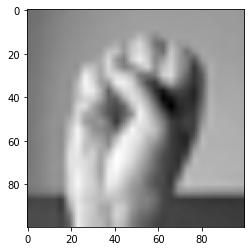

In [ ]:
for i in range(len(X_train2)):
  if(Y_train2[i][17]==1):
    gen_image(X_train2[i])
    break


In [ ]:
from keras.optimizers import SGD, RMSprop
from keras.layers import MaxPool2D
from keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau
# First 4 layers of model
model = Sequential()
# Layer 1
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(100,100,1)))
model.add(MaxPool2D(pool_size=(2,2))) # downsampling
model.add(Dropout(0.25)) # Dropout reduces overfitting
# Layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='swish'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='swish'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
# Fully connected layers
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# use categorical crossentropy as loss function
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define model parameters
epochs = 50
batch_size = 80
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
model.summary() # get model architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          3

In [ ]:
print(X_train2[0].shape)

(100, 100, 1)


In [ ]:
# Fit model - Use first line when predicting and second "final" line when using validation set to find # of epochs

model.fit(X_train2, Y_train2, batch_size=batch_size, epochs=epochs, validation_data=(X_val,Y_val), callbacks=[learning_rate_reduction])
#final = model.fit(X_train2, Y_train2, batch_size=batch_size, epochs=epochs, validation_data=(X_val,Y_val), callbacks=[learning_rate_reduction])

Epoch 1/50
344/344 [==============================] - 19s 33ms/step - loss: 2.8983 - accuracy: 0.1252 - val_loss: 0.6966 - val_accuracy: 0.7578
Epoch 2/50
344/344 [==============================] - 11s 31ms/step - loss: 0.5784 - accuracy: 0.7989 - val_loss: 0.1976 - val_accuracy: 0.9461
Epoch 3/50
344/344 [==============================] - 11s 31ms/step - loss: 0.1208 - accuracy: 0.9604 - val_loss: 0.0030 - val_accuracy: 0.9996
Epoch 4/50
344/344 [==============================] - 11s 31ms/step - loss: 0.0580 - accuracy: 0.9833 - val_loss: 7.0051e-04 - val_accuracy: 0.9998
Epoch 5/50
344/344 [==============================] - 11s 31ms/step - loss: 0.0372 - accuracy: 0.9886 - val_loss: 3.8040e-04 - val_accuracy: 1.0000
Epoch 6/50
344/344 [==============================] - 11s 31ms/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 1.1218e-04 - val_accuracy: 1.0000
Epoch 7/50
344/344 [==============================] - 11s 31ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 6.7474e-04

In [ ]:
model.evaluate(X_test2, Y_test2)

225/225 [==============================] - 1s 6ms/step - loss: 0.4911 - accuracy: 0.9580


[0.49108147621154785, 0.9580312371253967]

In [ ]:
# serialize to JSON
json_file = model.to_json()
with open("/gdrive/MyDrive/ASL/model.js", "w") as file:
   file.write(json_file)
# serialize weights to HDF5
model.save_weights("/gdrive/MyDrive/ASL/model_weights.h5")
print("saved")

saved


In [ ]:
import cv2
import numpy as np
#import onnxruntime as ort
from keras_preprocessing import image
#from google.colab.patches import cv2_imshow
from google.colab import files
from io import BytesIO
from PIL import Image
from google.colab.patches import cv2_imshow
'''
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['eg.jpg']))
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()
frame = im
'''

def center_crop(frame):
    h, w, _ = frame.shape
    start = abs(h - w) // 2
    if h > w:
        return frame[start: start + w]
    return frame[:, start: start + h]





In [ ]:
!pip install anvil-uplink

     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-cp37-none-any.whl size=45216 sha256=54fecd3b58c03d4f2e88fa7e1236e596e49020df1602db5fe19a730dd20c5075
  Stored in directory: /root/.cache/pip/wheels/a2/6e/4e/8b0ae12fb9b8a05715256952cf7609a8ab86285fab99b88c68
Successfully built ws4py


In [ ]:
import anvil.server
@anvil.server.callable

def main(im):
    # constants
  #im=im.astype(float)
  im=np.array(im)
  index_to_letter = list('ABCDEFGHIKLMNOPQRSTUVWXY')
  mean = 0.485 * 255.
  std = 0.229 * 255.

    # create runnable session with exported model
    #ort_session = ort.InferenceSession("signlanguage.onnx")

  #cap = cv2.VideoCapture(0)

  #while True:
        # Capture frame-by-frame
    #ret, frame = cap.read()

        # preprocess data
  #frame = cv2.imread("/gdrive/MyDrive/ASL/eg.jpg");
  #im = cv2.imread(r'/gdrive/MyDrive/ASL/eg.jpg')
  #frame=image.img_to_array(im)
  frame = center_crop(im)
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  x = cv2.resize(frame, (100, 100))
  #x = (x - mean) / std
  x = x.reshape(1,100,100,1).astype(np.float32)
  print(x.shape)
  y = model.predict(x)
       # y = ort_session.run(None, {'input': x})[0]


  index = np.argmax(y, axis=1)
  letter = index_to_letter[int(index)]
  print(letter)
  #cv2.putText(frame, letter, (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (0, 255, 0), thickness=2)
  #cv2_imshow(frame)

 
  #cv2.waitKey(0)

  return letter


In [ ]:
anvil.server.connect("RU5OWHXXWXYYRRCUS2VLGKUO-PAPOUF4M37VS7FL7")

In [ ]:
anvil.server.wait_forever()

KeyboardInterrupt: ignored

**jup**

In [ ]:
! pip install jupyter-dash

In [ ]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output# Load Data

In [ ]:
df = px.data.tips()# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Sign Language Convertor"),
    dcc.Upload("image"),
    html.Label([
        "Alphabet",

       ''' dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])'''
    ]),
])# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(Alphabet):
    letter = main(Alphabet)
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )# Run app and display result inline in the notebook

In [ ]:
app.run_server(mode='external')


Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
import matplotlib
matplotlib.use('Agg')
import tkinter as tk


import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
root=tk.Tk()
canvas1 = tk.Canvas(root,width=500, height = 300)
canvas1.pack()


**gradio**

In [ ]:
!pip install --quiet gradio

     |████████████████████████████████| 1.1MB 8.7MB/s 
     |████████████████████████████████| 215kB 27.7MB/s 
     |████████████████████████████████| 3.2MB 35.4MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
     |████████████████████████████████| 962kB 42.5MB/s 


In [ ]:
import gradio as gr
import time

def replace(text):
    time.sleep(135)
    return text.replace('World', 'Google')

gr.Interface(fn=replace, 
             inputs='textbox', 
             outputs='textbox').launch(share=True);


""" Equivalent Code:
gr.Interface(fn=replace,  
             inputs=gr.inputs.Textbox(), 
             outputs=gr.outputs.Textbox()).launch();
""";

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://32075.gradio.app
Interface loading below...


In [ ]:
import cv2
import numpy as np
#import onnxruntime as ort
from keras_preprocessing import image
#from google.colab.patches import cv2_imshow
from google.colab import files
from io import BytesIO
from PIL import Image
from google.colab.patches import cv2_imshow
'''
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['eg.jpg']))
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()
frame = im
'''

def center_crop(frame):
    h, w, _ = frame.shape
    start = abs(h - w) // 2
    if h > w:
        return frame[start: start + w]
    return frame[:, start: start + h]




def main(im):
    # constants
  index_to_letter = list('ABCDEFGHIKLMNOPQRSTUVWXY')
  mean = 0.485 * 255.
  std = 0.229 * 255.

    # create runnable session with exported model
    #ort_session = ort.InferenceSession("signlanguage.onnx")

  #cap = cv2.VideoCapture(0)

  #while True:
        # Capture frame-by-frame
    #ret, frame = cap.read()

        # preprocess data
  #frame = cv2.imread("/gdrive/MyDrive/ASL/eg.jpg");
  #im = cv2.imread(r'/gdrive/MyDrive/ASL/eg.jpg')
  frame=image.img_to_array(im)
  frame = center_crop(frame)
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  x = cv2.resize(frame, (100, 100))
  #x = (x - mean) / std
  x = x.reshape(1,100,100,1).astype(np.float32)
  print(x.shape)
  y = model.predict(x)
       # y = ort_session.run(None, {'input': x})[0]


  index = np.argmax(y, axis=1)
  letter = index_to_letter[int(index)]
  print(letter)
  #cv2.putText(frame, letter, (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (0, 255, 0), thickness=2)
  #cv2_imshow(frame)

 
  #cv2.waitKey(0)

  return letter

#webcam = gr.in.Webcam(shape=(500, 500))

#webcam = gr.inputs.Webcam(shape=(200,200))
im = gr.inputs.Image(label="Input Image", source="webcam")
label = gr.outputs.Label()
gr.Interface(fn=main, 
             inputs=im, 
             outputs=label).launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://43642.gradio.app
Interface loading below...


**convert model to onnx**

In [ ]:
pip install git+https://github.com/onnx/tensorflow-onnx


In [ ]:
pip install keras2onnx

In [ ]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import load_model
import onnx
import keras2onnx

onnx_model_name = 'ASL.onnx'

#model = load_model('model-resnet50-final.h5')
onnx_model = keras2onnx.convert_keras(model, model.name)
onnx.save_model(onnx_model, onnx_model_name)

In [ ]:
import cv2
import numpy as np
#import onnxruntime as ort
from keras_preprocessing import image
#from google.colab.patches import cv2_imshow
from google.colab import files
from io import BytesIO
from PIL import Image
from google.colab.patches import cv2_imshow

'''
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['eg.jpg']))
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()
frame = im
'''
im = cv2.imread(r'/gdrive/MyDrive/ASL/eg.jpg')


def center_crop(frame):
    h, w, _ = frame.shape
    start = abs(h - w) // 2
    if h > w:
        return frame[start: start + w]
    return frame[:, start: start + h]


def main():
    # constants
  index_to_letter = list('ABCDEFGHIKLMNOPQRSTUVWXY')
  mean = 0.485 * 255.
  std = 0.229 * 255.

    # create runnable session with exported model
    #ort_session = ort.InferenceSession("signlanguage.onnx")

  #cap = cv2.VideoCapture(0)

  #while True:
        # Capture frame-by-frame
    #ret, frame = cap.read()

        # preprocess data
  #frame = cv2.imread("/gdrive/MyDrive/ASL/eg.jpg");
  frame=image.img_to_array(im)
  frame = center_crop(frame)
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  x = cv2.resize(frame, (28, 28))
  #x = (x - mean) / std
  x = x.reshape(1,28,28,1).astype(np.float32)
  print(x.shape)
  y = model.predict(x)
       # y = ort_session.run(None, {'input': x})[0]


  index = np.argmax(y, axis=1)
  letter = index_to_letter[int(index)]

  cv2.putText(frame, letter, (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (0, 255, 0), thickness=2)
  cv2_imshow(frame)

  #  if cv2.waitKey(1) & 0xFF == ord('q'):
   #   break

  #cap.release()
  #cv2.destroyAllWindows()
  cv2.waitKey(0)

#if __name__ == '__main__':
main()


#from google.colab.patches import cv2_imshow
#img = cv2.imread('https://drive.google.com/file/d/1bS6rNOCihkq7yYRtrhDP8B2mIqodTwLi/view?usp=sharing',cv2.IMREAD_UNCHANGED);
#print(img)

In [ ]:
print(im)
im=image.img_to_array(im)
print(im)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


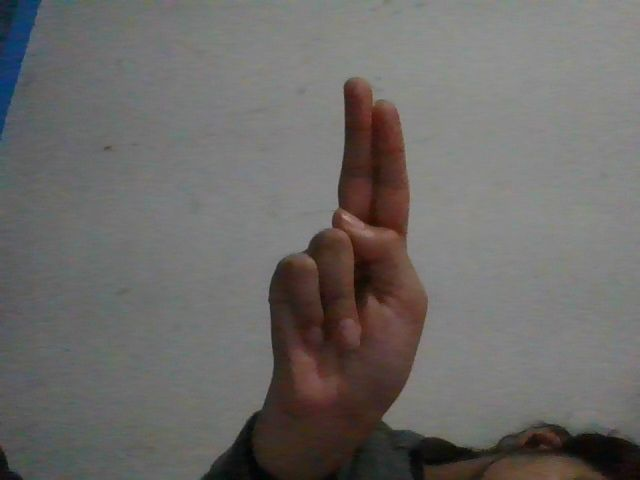

In [ ]:
from IPython.display import Image
filename = []
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2
import numpy as np
#import onnxruntime as ort
from keras_preprocessing import image
#from google.colab.patches import cv2_imshow
from google.colab import files
from io import BytesIO
from PIL import Image
from google.colab.patches import cv2_imshow

'''
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['eg.jpg']))
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()
frame = im
'''
#im1 = cv2.imread(r'/content/drive/MyDrive/ASL/ss.jpg')




def center_crop(frame):
    h, w, _ = frame.shape
    start = abs(h - w) // 2
    if h > w:
        return frame[start: start + w]
    return frame[:, start: start + h]


def main(im):
    # constants
  index_to_letter = list('ABCDEFGHIKLMNOPQRSTUVWXY')
  mean = 0.485 * 255.
  std = 0.229 * 255.

    # create runnable session with exported model
    #ort_session = ort.InferenceSession("signlanguage.onnx")

  #cap = cv2.VideoCapture(0)

  #while True:
        # Capture frame-by-frame
    #ret, frame = cap.read()

        # preprocess data
  #frame = cv2.imread("/gdrive/MyDrive/ASL/eg.jpg");
  frame=image.img_to_array(im)
  #frame=np.array(result)
  #frame=result
  frame = center_crop(frame)
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  x = cv2.resize(frame, (100, 100))
  x = (x - mean) / std
  x = x.reshape(1,100,100,1).astype(np.float32)
  print(x.shape)
  y = model.predict(x)
  def gen_image(image):
    """Return 28x28 image given grayscale values"""
    pixels = image.reshape((100,100))
    #pixels = image
    plt.imshow(pixels, cmap='gray')
    plt.show()
  gen_image(x)
       # y = ort_session.run(None, {'input': x})[0]


  index = np.argmax(y, axis=1)
  letter = index_to_letter[int(index)]

  return letter
#if __name__ == '__main__':


#from google.colab.patches import cv2_imshow
#img = cv2.imread('https://drive.google.com/file/d/1bS6rNOCihkq7yYRtrhDP8B2mIqodTwLi/view?usp=sharing',cv2.IMREAD_UNCHANGED);
#print(img)

In [ ]:
!pip install tensorflowjs 

In [ ]:
!tensorflowjs_converter --input_format keras model/

In [ ]:
<script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs@latest"> </script>


In [ ]:
!pip install streamlit

In [ ]:
python --version


NameError: ignored

In [ ]:
import streamlit as st
def main1():
  st.title("Sign Language Translator")
    
  html_temp = """
    <div style="background-color:#025246 ;padding:10px">
    <h2 style="color:white;text-align:center;">Sign Language Translator</h2>
    </div>
    """
  st.markdown(html_temp, unsafe_allow_html=True)

    
  image_file = st.file_uploader("Upload Image", type=['jpg', 'png', 'jpeg'])
  if image_file is not None:
    our_image = Image.open(image_file)
    st.text("Original Image")
    st.image(our_image)
  if st.button("Recognise"):
    result= main(our_image)
    st.text('Alphabet: {}'.format(result))

main1()


ModuleNotFoundError: ignored

**flask**

In [ ]:
!pip install flask-ngrok

In [ ]:
from IPython.display import HTML

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify, render_template
app = Flask(__name__)
run_with_ngrok(app)
@app.route('/content/drive/MyDrive/ASL')
def home():
    return render_template('/content/drive/MyDrive/ASL/index.html')



app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b8828d21f6cd.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [27/Feb/2021 11:57:13] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [27/Feb/2021 11:57:14] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [27/Feb/2021 11:57:35] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [27/Feb/2021 12:06:32] "GET / HTTP/1.1" 404 -


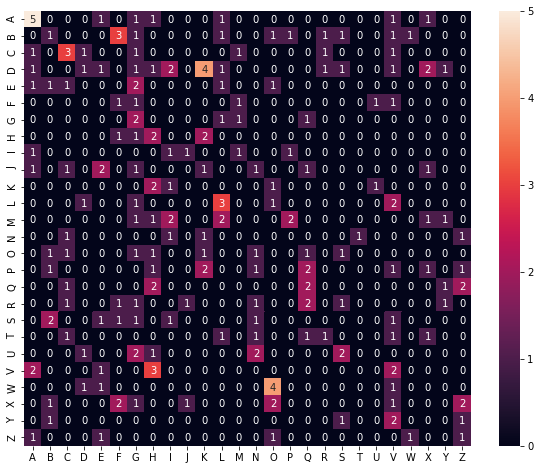

In [ ]:
from sklearn.metrics import confusion_matrix
results = model.predict(X_test2) # predict test labels
Y_pred_classes = np.argmax(results, axis = 1) # Convert predictions classes to one hot vectors 
Y_true = np.argmax(Y_test,axis = 1) # Convert validation observations to one hot vectors

# Create confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# Print confusion matrix
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot()
sns.heatmap(confusion_mtx, annot=True, fmt="d");
labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R',\
             'S','T','U','V','W','X','Y','Z']
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);

In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:10]] # Get outputs of top 10 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Model returns outputs given inputs

In [ ]:
from keras.preprocessing import image
pix = np.array(X_train.iloc[0]).reshape((28,28)) # reshape input to 28x28
img_tensor = image.img_to_array(pix) # convert image to numpy array
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255. # normalize pixels
activations = activation_model.predict(img_tensor) # Returns a list Numpy arrays w/one array per layer activation

In [ ]:
layer_names = []
for layer in model.layers[:10]:
    layer_names.append(layer.name) # Names of the layers
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Create grid showing the filters
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
